<a href="https://colab.research.google.com/github/hariprithika707/Topic-Modelling/blob/main/EX1_Topic_Modelling_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import spacy
import gensim.corpora as corpora
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
!pip install gensim
!pip install pyLDAvis
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import requests
from bs4 import BeautifulSoup

def fetch_url(url):
    # Send an HTTP request to fetch the page content
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    # Find the relevant content (e.g., paragraphs)
    paragraphs = soup.find_all("p")
    return [p.get_text() for p in paragraphs]


urls = [
    "https://thehackernews.com/2022/08/conti-cybercrime-cartel-using-bazarcall.html",
    "https://thehackernews.com/2024/06/moreeggs-malware-disguised-as-resumes.html",
    "https://thehackernews.com/2022/10/bazarcall-callback-phishing-attacks.html",
    "https://thehackernews.com/2024/05/mysterious-cyber-attack-takes-down.html",
    "https://thehackernews.com/2023/05/new-phishing-as-service-platform-lets.html",
    "https://thehackernews.com/2024/03/apt28-hacker-group-targeting-europe.html"
]


all_text_data = []
for url in urls:
    all_text_data.extend(fetch_url(url))


df = pd.DataFrame({"text": all_text_data})


print(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                  text
0    A trio of offshoots from the notorious Conti c...
1    "Three autonomous threat groups have since ado...
2    These targeted campaigns "substantially increa...
3    The actors in question include Silent Ransom, ...
4    The advanced social engineering tactic, also c...
..                                                 ...
100  The climax of APT28's elaborate scheme ends wi...
101  "ITG05 remains adaptable to changes in opportu...
102  Don't let certificate changes disrupt your bus...
103  Guard your business like a Fortune 500 with a ...
104  Get the latest news, expert insights, exclusiv...

[105 rows x 1 columns]


In [ ]:
# Convert to lowercase
df['text'] = df['text'].str.lower()
df['text'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    a trio of offshoots from the notorious conti c...
1    "three autonomous threat groups have since ado...
2    these targeted campaigns "substantially increa...
3    the actors in question include silent ransom, ...
4    the advanced social engineering tactic, also c...
Name: text, dtype: object

In [ ]:
# Remove punctuation from text
import string
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['text'] = df['text'].replace("-", "")
df['text'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    a trio of offshoots from the notorious conti c...
1    three autonomous threat groups have since adop...
2    these targeted campaigns substantially increas...
3    the actors in question include silent ransom q...
4    the advanced social engineering tactic also ca...
Name: text, dtype: object

In [ ]:
# Stop Words Removal
stop_word = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))
df['text'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    trio offshoots notorious conti cybercrime cart...
1    three autonomous threat groups since adopted i...
2    targeted campaigns substantially increased att...
3    actors question include silent ransom quantum ...
4    advanced social engineering tactic also called...
Name: text, dtype: object

In [ ]:
#Tokenization
df['text'] = df['text'].apply(lambda x: x.split())
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text
0,"[trio, offshoots, notorious, conti, cybercrime..."
1,"[three, autonomous, threat, groups, since, ado..."
2,"[targeted, campaigns, substantially, increased..."
3,"[actors, question, include, silent, ransom, qu..."
4,"[advanced, social, engineering, tactic, also, ..."


In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
tokens_lemmatized = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in df['text']]
print("Lemmatized Tokens:", tokens_lemmatized)

Lemmatized Tokens: [['trio', 'offshoot', 'notorious', 'conti', 'cybercrime', 'cartel', 'resorted', 'technique', 'call', 'back', 'phishing', 'initial', 'access', 'vector', 'breach', 'targeted', 'network'], ['three', 'autonomous', 'threat', 'group', 'since', 'adopted', 'independently', 'developed', 'targeted', 'phishing', 'tactic', 'derived', 'call', 'back', 'phishing', 'methodology', 'cybersecurity', 'firm', 'advintel', 'said', 'wednesday', 'report'], ['targeted', 'campaign', 'substantially', 'increased', 'attack', 'entity', 'finance', 'technology', 'legal', 'insurance', 'sector', 'company', 'added'], ['actor', 'question', 'include', 'silent', 'ransom', 'quantum', 'royzeon', 'split', 'conti', 'ransomwareasaservice', 'raas', 'cartel', 'orchestrated', 'shutdown', 'may', '2022', 'following', 'public', 'support', 'russia', 'ongoing', 'russoukrainian', 'conflict'], ['advanced', 'social', 'engineering', 'tactic', 'also', 'called', 'bazacall', 'aka', 'bazarcall', 'came', 'spotlight', '20202021

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['text'] = df['text'].apply(' '.join)
def tolist(string):
    li = string.split(" ")
    return li

data = df['text'].apply(tolist).tolist()
print(data[0:10])

[['trio', 'offshoots', 'notorious', 'conti', 'cybercrime', 'cartel', 'resorted', 'technique', 'call', 'back', 'phishing', 'initial', 'access', 'vector', 'breach', 'targeted', 'networks'], ['three', 'autonomous', 'threat', 'groups', 'since', 'adopted', 'independently', 'developed', 'targeted', 'phishing', 'tactics', 'derived', 'call', 'back', 'phishing', 'methodology', 'cybersecurity', 'firm', 'advintel', 'said', 'wednesday', 'report'], ['targeted', 'campaigns', 'substantially', 'increased', 'attacks', 'entities', 'finance', 'technology', 'legal', 'insurance', 'sectors', 'company', 'added'], ['actors', 'question', 'include', 'silent', 'ransom', 'quantum', 'royzeon', 'split', 'conti', 'ransomwareasaservice', 'raas', 'cartel', 'orchestrated', 'shutdown', 'may', '2022', 'following', 'public', 'support', 'russia', 'ongoing', 'russoukrainian', 'conflict'], ['advanced', 'social', 'engineering', 'tactic', 'also', 'called', 'bazacall', 'aka', 'bazarcall', 'came', 'spotlight', '20202021', 'put',

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from nltk.util import bigrams

# Convert the list of lists to a single string
data_str = ' '.join([' '.join(inner_list) for inner_list in data])

# Tokenize the text
tokens = nltk.word_tokenize(data_str)  # Pass the single string here

# Generate bigrams
bigram= list(bigrams(tokens))

# Print the bigrams
print(f"Bigrams for the list of words '{data_str[:20]}':")  # Use data_str for preview
print(bigram[:20])

Bigrams for the list of words 'trio offshoots notor':
[('trio', 'offshoots'), ('offshoots', 'notorious'), ('notorious', 'conti'), ('conti', 'cybercrime'), ('cybercrime', 'cartel'), ('cartel', 'resorted'), ('resorted', 'technique'), ('technique', 'call'), ('call', 'back'), ('back', 'phishing'), ('phishing', 'initial'), ('initial', 'access'), ('access', 'vector'), ('vector', 'breach'), ('breach', 'targeted'), ('targeted', 'networks'), ('networks', 'three'), ('three', 'autonomous'), ('autonomous', 'threat'), ('threat', 'groups')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
id2word=corpora.Dictionary(bigram)
print(id2word)
texts=bigram
corpus=[id2word.doc2bow(word) for word in bigram]
print(corpus[:1][0][:20])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary<1192 unique tokens: ['offshoots', 'trio', 'notorious', 'conti', 'cybercrime']...>
[(0, 1), (1, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


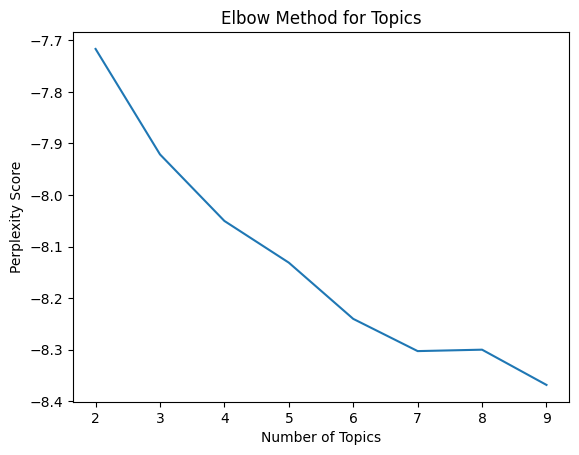

In [ ]:

import multiprocessing

def compute_perplexity_values(dictionary, corpus, limit, start=2, step=1):
    num_cores = multiprocessing.cpu_count()

    with multiprocessing.Pool(num_cores) as pool:
        perplexity_values = pool.starmap(
            _compute_perplexity,
            [(corpus, num_topics, dictionary) for num_topics in range(start, limit, step)]
        )

    return perplexity_values

def _compute_perplexity(corpus, num_topics, dictionary):
    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=5)
    return model.log_perplexity(corpus)

# Run LDA for different number of topics
start, limit, step = 2, 10, 1
perplexity_values = compute_perplexity_values(dictionary, corpus, limit, start, step)

# Plot the perplexity scores
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.title("Elbow Method for Topics")
plt.show()

In [ ]:
# Tf-idf vectorization
from gensim.models import TfidfModel
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim import corpora
from gensim.models import LdaModel

df['tokens'] = df['text'].apply(nltk.word_tokenize)  # Tokenize each string in 'text' column

doc = corpora.Dictionary(df['tokens'])  # Pass the list of tokenized documents
corpus = [doc.doc2bow(tokens) for tokens in df['tokens']]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=3, id2word=doc, passes=15)

# Display topics
topics = lda_model.print_topics(num_words=6)
print("\nTopics:")
for topic in topics:
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topics:
(0, '0.010*"phishing" + 0.009*"attacks" + 0.007*"access" + 0.005*"targeted" + 0.005*"page" + 0.005*"said"')
(1, '0.009*"said" + 0.007*"conti" + 0.006*"campaigns" + 0.006*"phishing" + 0.005*"known" + 0.005*"threat"')
(2, '0.011*"business" + 0.011*"–" + 0.011*"resources" + 0.007*"also" + 0.007*"like" + 0.006*"latest"')


In [ ]:
# Get document-topic matrix
document_topic_matrix = lda_model.get_document_topics(corpus)

# Initialize topic-word matrix
topic_word_matrix = lda_model.get_topics()

# Display topics
topics = lda_model.print_topics(num_words=3)
print("\nTopics:")
for topic in topics:
    print(topic)


Topics:
(0, '0.010*"phishing" + 0.009*"attacks" + 0.007*"access"')
(1, '0.009*"said" + 0.007*"conti" + 0.006*"campaigns"')
(2, '0.011*"business" + 0.011*"–" + 0.011*"resources"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Display document-topic matrix
print("\nDocument-Topic Matrix:")
for i, doc_topics in enumerate(document_topic_matrix):
    print(f"Document {i}: {doc_topics}")


Document-Topic Matrix:
Document 0: [(0, 0.9611143), (1, 0.019791085), (2, 0.019094592)]
Document 1: [(0, 0.9683841), (1, 0.01618512), (2, 0.015430796)]
Document 2: [(0, 0.9498119), (1, 0.025871765), (2, 0.024316365)]
Document 3: [(0, 0.01579317), (1, 0.9700384), (2, 0.014168408)]
Document 4: [(0, 0.017085973), (1, 0.017856328), (2, 0.96505773)]
Document 5: [(0, 0.018469663), (1, 0.96375555), (2, 0.017774818)]
Document 6: [(0, 0.0146145625), (1, 0.014207752), (2, 0.9711777)]
Document 7: [(0, 0.010838488), (1, 0.010509397), (2, 0.9786522)]
Document 8: [(0, 0.96094453), (1, 0.019397203), (2, 0.019658275)]
Document 9: [(0, 0.019205397), (1, 0.9633708), (2, 0.017423777)]
Document 10: [(0, 0.9799661), (2, 0.010092606)]
Document 11: [(0, 0.97536206), (1, 0.012439224), (2, 0.012198731)]
Document 12: [(0, 0.9365603), (1, 0.032245576), (2, 0.031194158)]
Document 13: [(0, 0.9688285), (1, 0.015579356), (2, 0.015592155)]
Document 14: [(0, 0.9758737), (1, 0.01156859), (2, 0.012557716)]
Document 15:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Display topic-word matrix
import numpy as np

print("\nTopic-Word Matrix:")
for i, topic_words in enumerate(topic_word_matrix):
    top_words = ', '.join([doc[word_id] for word_id in np.argsort(-topic_words)[:4]])
    print(f"Topic {i}: {top_words}")


Topic-Word Matrix:
Topic 0: phishing, attacks, access, targeted
Topic 1: said, conti, campaigns, phishing
Topic 2: business, –, resources, also


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


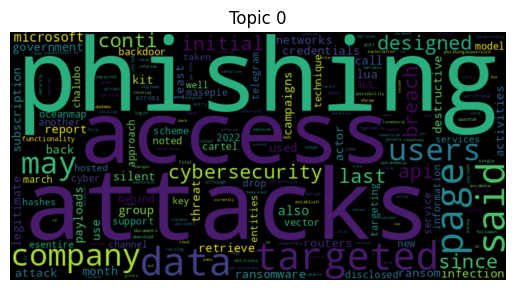

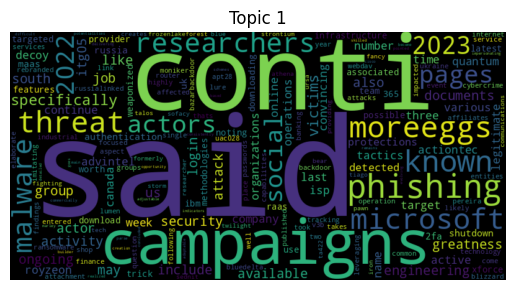

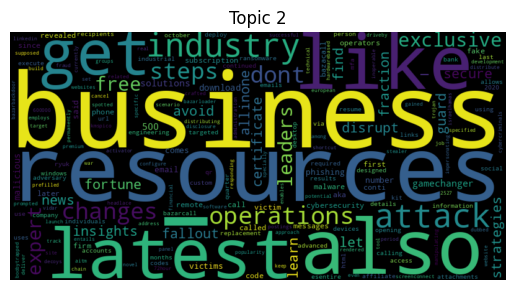

In [ ]:
# Generate word clouds for topics
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, topic in enumerate(topic_word_matrix):
    plt.figure()
    # Use 'doc' instead of 'dictionary' to access word mappings
    wordcloud = WordCloud(width=800, height=400, background_color ='black').fit_words({doc[word_id]: topic_word_matrix[i][word_id] for word_id in range(len(doc))})
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {i}")
    plt.show()

In [ ]:
# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.7769599851760794


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
